In [1]:
!pip install plotly

In [2]:
!pip install chart-studio

In [3]:
!pip install cufflinks

In [4]:
!pip install folium

In [5]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.tools as tls
from plotly.offline import init_notebook_mode
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import folium

In [6]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
p1=sns.cubehelix_palette(15)
p2=sns.cubehelix_palette(10)
p3=sns.cubehelix_palette(24)
p4=sns.cubehelix_palette(5)


In [7]:
df=pd.read_csv('C:\\Users\\Amshu\\Downloads\\Practicum 2\\Denver\\crime.csv')

In [8]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528586 entries, 0 to 528585
Data columns (total 19 columns):
INCIDENT_ID               528586 non-null int64
OFFENSE_ID                528586 non-null int64
OFFENSE_CODE              528586 non-null int64
OFFENSE_CODE_EXTENSION    528586 non-null int64
OFFENSE_TYPE_ID           528586 non-null object
OFFENSE_CATEGORY_ID       528586 non-null object
FIRST_OCCURRENCE_DATE     528586 non-null object
LAST_OCCURRENCE_DATE      167514 non-null object
REPORTED_DATE             528586 non-null object
INCIDENT_ADDRESS          476970 non-null object
GEO_X                     524191 non-null float64
GEO_Y                     524191 non-null float64
GEO_LON                   524191 non-null float64
GEO_LAT                   524191 non-null float64
DISTRICT_ID               528586 non-null int64
PRECINCT_ID               528586 non-null int64
NEIGHBORHOOD_ID           528586 non-null object
IS_CRIME                  528586 non-null int64
IS_TRAFFIC

In [10]:
df.FIRST_OCCURRENCE_DATE= pd.to_datetime(df.FIRST_OCCURRENCE_DATE)
df["YEAR"]=df.FIRST_OCCURRENCE_DATE.dt.year
df["DAY"]=df.FIRST_OCCURRENCE_DATE.dt.day
df["DAY_OF_WEEK"]=df.FIRST_OCCURRENCE_DATE.dt.dayofweek
df["MONTH"]=df.FIRST_OCCURRENCE_DATE.dt.month
df["HOUR"]=df.FIRST_OCCURRENCE_DATE.dt.hour
df.index=pd.DatetimeIndex(df["FIRST_OCCURRENCE_DATE"])

In [11]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,DAY,DAY_OF_WEEK,MONTH,HOUR
FIRST_OCCURRENCE_DATE,,,,,,,,,,,,,,,,,,,,,
2016-06-15 23:31:00,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,NaN,6/15/2016 11:31:00 PM,NaN,...,5,521,montbello,1,0,2016,15,2,6,23
2017-10-11 12:30:00,20186000994,20186000994239900,2399,0,theft-other,larceny,2017-10-11 12:30:00,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,...,5,522,gateway-green-valley-ranch,1,0,2017,11,2,10,12
2016-03-04 20:00:00,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,...,3,314,wellshire,1,0,2016,4,4,3,20
2018-01-30 19:20:00,201872333,201872333239900,2399,0,theft-other,larceny,2018-01-30 19:20:00,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,...,3,312,belcaro,1,0,2018,30,1,1,19
2017-06-22 20:53:00,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,2017-06-22 20:53:00,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,...,3,311,cherry-creek,1,0,2017,22,3,6,20


In [12]:
print("This Dataset Ranges from: {} to {}".format(df.index.min(),df.index.max()))

This Dataset Ranges from: 2014-01-02 00:00:00 to 2019-11-15 07:15:00


**Crime Vs Traffic**

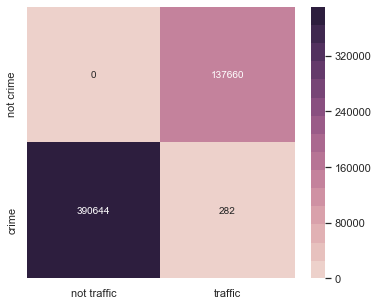

In [13]:
plt.figure(figsize=(6,5))
crime_and_traffic= pd.crosstab(index=df['IS_CRIME'],columns=df['IS_TRAFFIC'])
crime_and_traffic.index = ["not crime","crime"]
crime_and_traffic.columns = ["not traffic", "traffic"]
sns.heatmap(crime_and_traffic, annot=True, fmt="d", cmap=p1)

**Offense Categories Distribution**


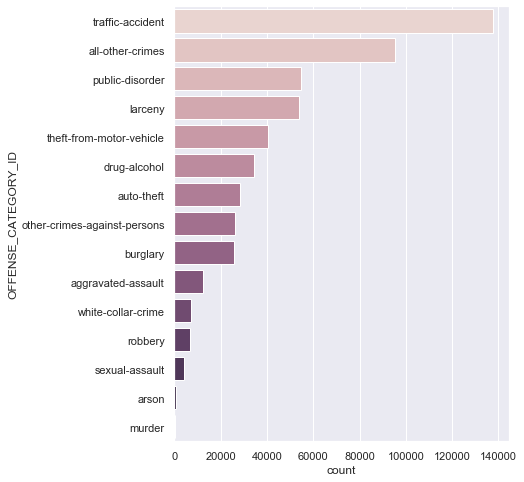

In [23]:
plt.figure(figsize=(6,8))
cat_freq=df.OFFENSE_CATEGORY_ID.value_counts()
sns.countplot(y="OFFENSE_CATEGORY_ID", data=df, order=cat_freq.index,palette=p1)

**Frequency of Accidents excluding Traffic**

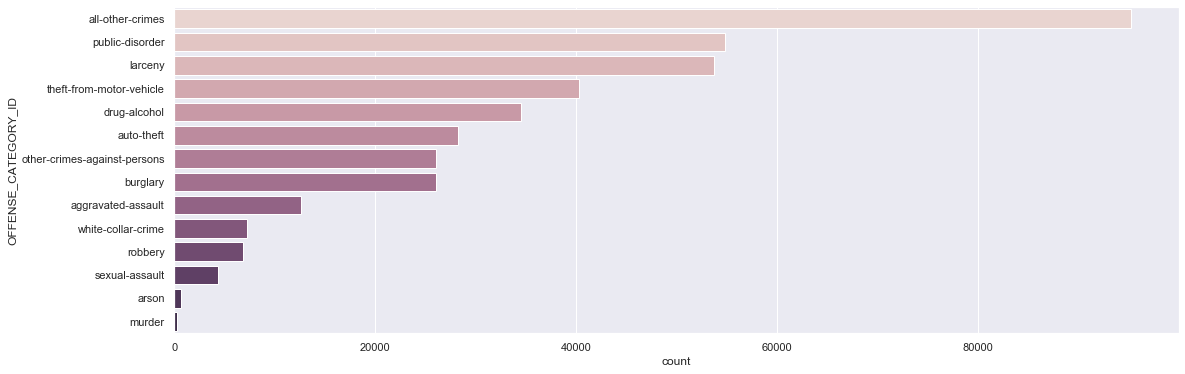

In [60]:
plt.figure(figsize=(18,6))
type_freq=df.OFFENSE_CATEGORY_ID.value_counts()
common_types= type_freq.iloc[1:15]
sns.countplot(y="OFFENSE_CATEGORY_ID",data=df,order=common_types.index,palette=p1)

All Other Crimes

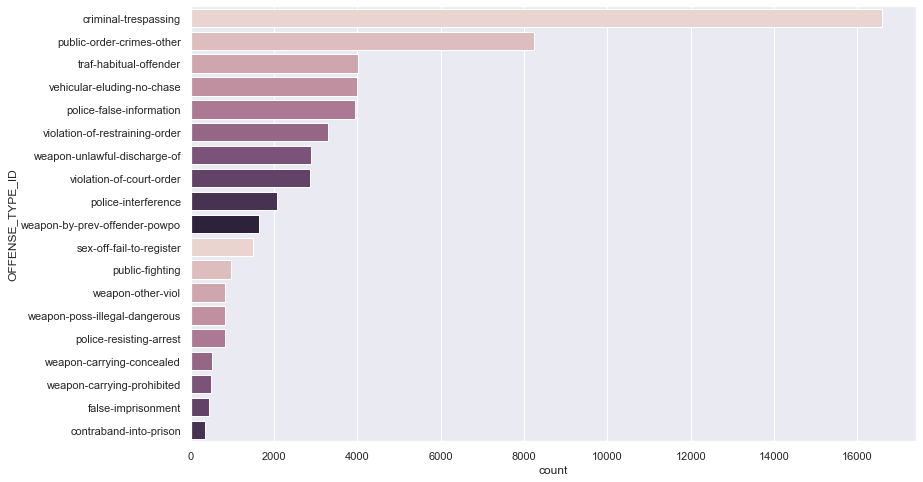

In [39]:
plt.figure(figsize=(13,8))
other_crimes = df[df.OFFENSE_CATEGORY_ID=="all-other-crimes"]
other_crimes_freq = other_crimes.OFFENSE_TYPE_ID.value_counts()
other_common_types=other_crimes_freq.iloc[1:20]
f.suptitle("All other crimes",fontsize=32)
axes[0].set_title("All Other Crime")
sns.countplot(y="OFFENSE_TYPE_ID",data=other_crimes,order=other_common_types.index, palette=p2)


Crime vs Traffic over months

In [16]:
crimes_df=df[df.IS_CRIME==1]
traffic_df=df[df.IS_TRAFFIC==1]

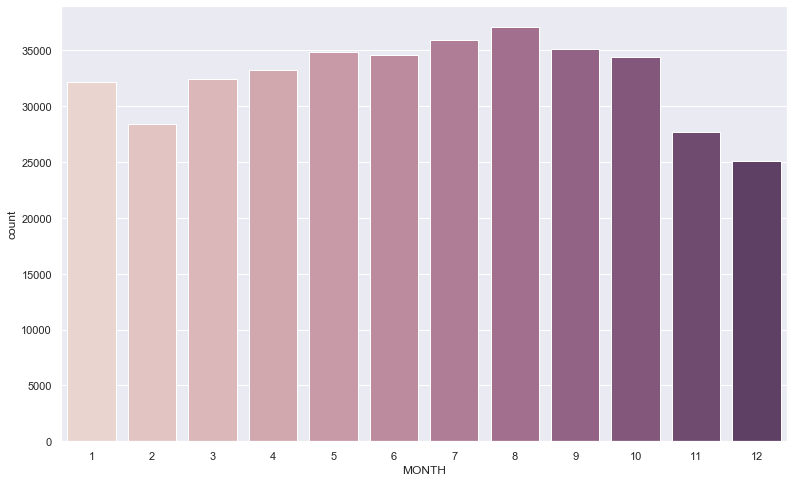

In [41]:
plt.figure(figsize=(13,8))
sns.countplot(x="MONTH",data=crimes_df,palette=p1)


Crime vs Traffic per hour

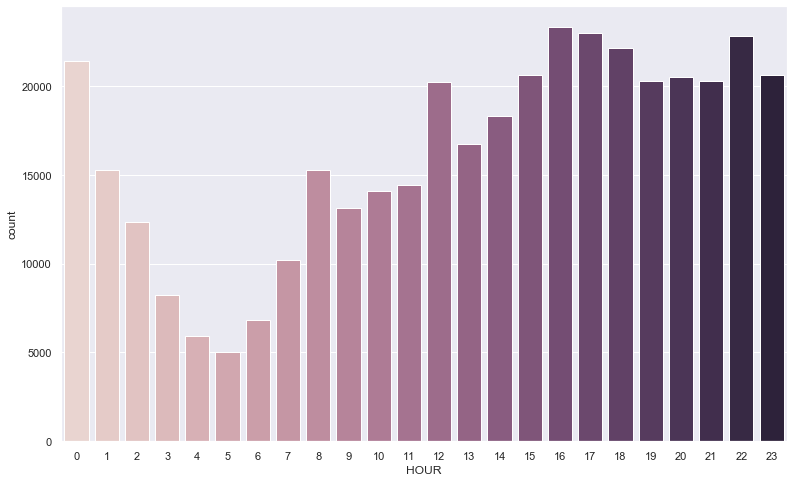

In [61]:
plt.figure(figsize=(13,8))
sns.countplot(x="HOUR", data=crimes_df, palette=p3)

In [ ]:
sns.countplot(x="HOUR", data=traffic_df, palette=p3)

Overall Crime Trends

In [19]:
crimes_per_day=pd.DataFrame(crimes_df.resample('D').size())
crimes_per_day["MEAN"]=crimes_df.resample('D').size().mean()
crimes_per_day["STD"]=crimes_df.resample('D').size().std()

UL=crimes_per_day['MEAN'] + 3 * crimes_per_day['STD']
LL=crimes_per_day['MEAN'] - 3 * crimes_per_day['STD']

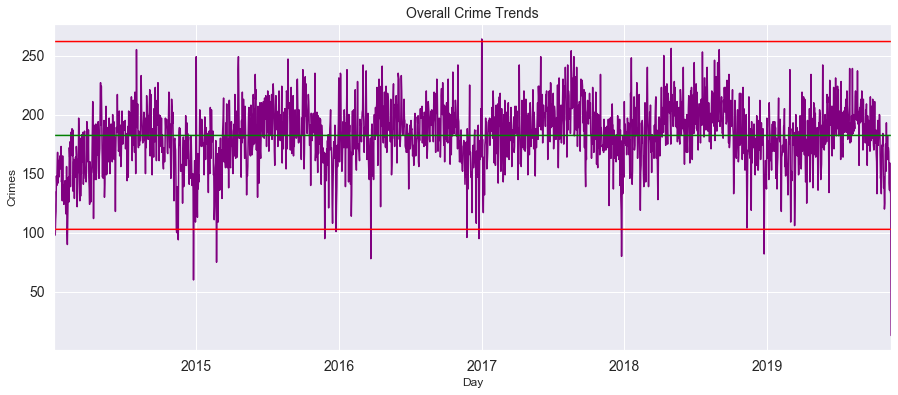

In [20]:
plt.figure(figsize=(15,6))
crimes_df.resample('D').size().plot(label='Crimes per day', color='purple')
UL.plot(color='red', label='UL')
LL.plot(color='red', label='LL')
crimes_per_day['MEAN'].plot(color='green')
plt.title('Overall Crime Trends',fontsize=14)
plt.xlabel('Day')
plt.ylabel("Crimes")
plt.tick_params(labelsize=14)

Monthly Statistics

In [ ]:
month_df= crimes_df.resample('M').size()
plt.figure(figsize=(15,6))
month_df.plot(label='Total crimes per month', color='purple')
month_df.rolling(window=12).mean().plot(color='red')
plt.title('Overall trend by month')

In [ ]:
print("Best Month {0}: {1}".format(month_df.idxmin(),month_df[month_df.idxmin()]))
print("Worst Month {0}: {1}".format(month_df.idxmax(),month_df[month_df.idxmax()]))


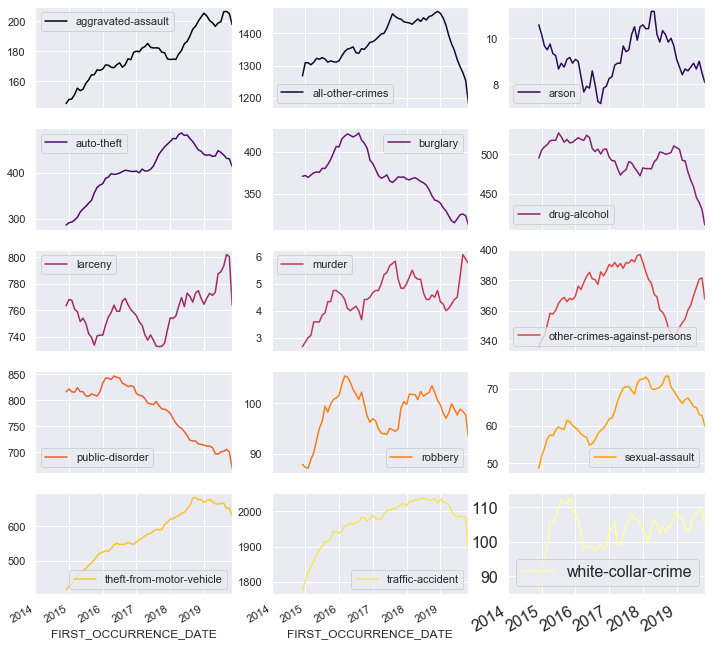

In [47]:
df.index.name=None
df.pivot_table(index='FIRST_OCCURRENCE_DATE', columns='OFFENSE_CATEGORY_ID', aggfunc='size', fill_value=0).resample('M').sum().rolling(window=12).mean().plot(figsize=(12,12), cmap='inferno', subplots=True, layout=(-1,3))
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);


$Neighbourhoods$

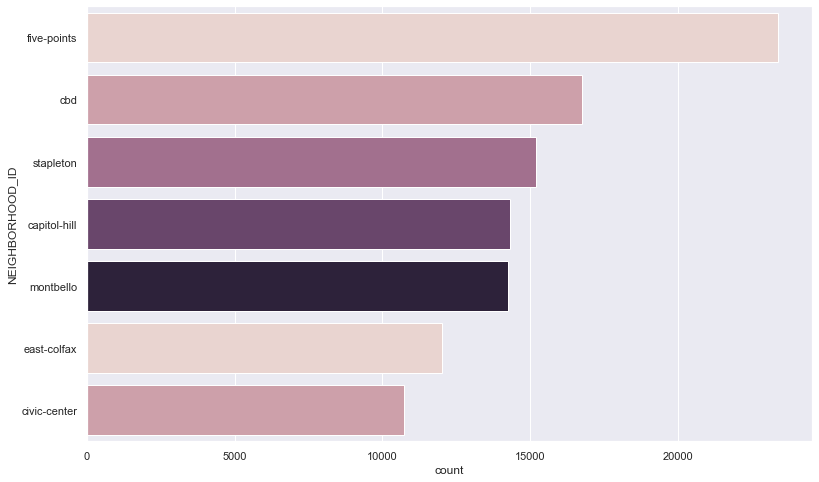

In [62]:
plt.figure(figsize=(13,8))
neigh_freq=crimes_df.NEIGHBORHOOD_ID.value_counts()
danger=neigh_freq.iloc[:7]
axes[0].set_title("Dangerous Neighbourhoods")
sns.countplot(y="NEIGHBORHOOD_ID", data=crimes_df, order=danger.index, palette=p4)


$Weekday$

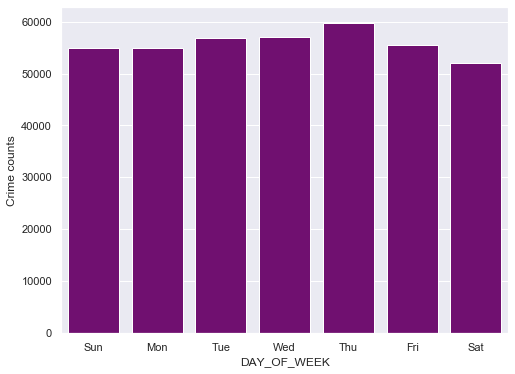

In [64]:
weekdays=["Sun","Mon","Tue", "Wed", "Thu", "Fri", "Sat"]
week_df= pd.DataFrame(crimes_df["DAY_OF_WEEK"].value_counts()).sort_index()
week_df["DAY"]= weekdays
week_df.columns=["Crime counts","DAY_OF_WEEK"]
plt.figure(figsize=(8,6))
sns.barplot(x="DAY_OF_WEEK", y="Crime counts", color="purple", data=week_df)


In [49]:
df1=pd.read_csv('C:\\Users\\Amshu\\Downloads\\Practicum 2\\Denver\\GdeltDenver.csv')
df1.columns

C:\Users\Amshu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (14,24,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.



Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'EventBaseCode', 'EventRootCode', 'QuadClass',
       'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone',
       'Actor1Geo_Type', 'Actor1Geo_FullName', 'Actor1Geo_CountryCode',
       'Actor1Geo_ADM1Code', 'Actor1Geo_Lat', 'Actor1Geo_Long',
       'Actor1Geo_FeatureID', 'Actor2Geo_Type', 'Actor2Geo_FullName',
       'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code', 'Actor2Geo_Lat',
       'Actor2Geo_Long', 'Actor2Geo_FeatureID', 'Action

In [50]:
df1=df1[['SQLDATE','NumArticles','AvgTone']]
print(df1)

          SQLDATE  NumArticles    AvgTone
0        20140320           13   3.796506
1        20140320           10   1.677852
2        20140320            8   1.058201
3        20140320            1   1.058201
4        20140320            5   2.402957
5        20140320           10   1.830443
6        20140320            6   0.942763
7        20140320            2   1.107011
8        20140320           10   1.873330
9        20140320            2   1.107011
10       20140320            3   1.597444
11       20140320           12   2.497096
12       20140320           10   2.931596
13       20140320            5   4.582210
14       20140320            2   4.713115
15       20140320            6   7.093185
16       20140320            6   2.931596
17       20140320            1   2.196382
18       20140320            1   2.196382
19       20140320            5   2.155172
20       20140320            1   3.664921
21       20140320            1   3.664921
22       20140320            4   3

In [51]:
df1['Tone']=df1.NumArticles*df1.AvgTone

In [52]:
df1.head()

,SQLDATE,NumArticles,AvgTone,Tone
0,20140320,13,3.796506,49.354579
1,20140320,10,1.677852,16.778523
2,20140320,8,1.058201,8.465608
3,20140320,1,1.058201,1.058201
4,20140320,5,2.402957,12.014787


In [53]:
df1=df1[['SQLDATE','Tone']]
df1.head()

,SQLDATE,Tone
0,20140320,49.354579
1,20140320,16.778523
2,20140320,8.465608
3,20140320,1.058201
4,20140320,12.014787


In [54]:
df1=df1.groupby('SQLDATE')['Tone'].mean()
print(df1)

SQLDATE
20140320     18.307818
20140321     22.164410
20140322     18.617043
20140323     35.089788
20140324     29.667215
20140325     32.233382
20140326     27.153260
20140327     24.572015
20140328     19.269738
20140329     40.299589
20140330     20.840384
20140331     22.212658
20140401     28.176600
20140402     31.131557
20140403     10.315910
20140404    -18.511549
20140405     28.461108
20140406     23.322162
20140407     20.297949
20140408     18.667865
20140409     18.421640
20140410     22.661979
20140411     17.552433
20140412     18.617701
20140413     13.031689
20140414     16.985528
20140415     19.652847
20140416     19.953972
20140417     30.263119
20140418     24.781849
               ...    
20191017     -8.777951
20191018    -33.300305
20191019     -9.137644
20191020     -7.579954
20191021    -26.157371
20191022   -111.936198
20191023    -50.068310
20191024    -83.498892
20191025     -5.754197
20191026     -6.704239
20191027     -3.150458
20191028    -27.390580
201